# Project 10 - Agriculture - (Dynamic)

In [1]:
#data analysis libraries 
import pandas as pd
import numpy as np
import datetime

#visualization libraries
import seaborn as sns
import matplotlib.pyplot as plt

#ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the train and test Excels
test = pd.read_excel('Data/test_agriculture.xlsx')
train = pd.read_excel('Data/train_agriculture.xlsx')

In [3]:
# Convert Excel from CSV
test.to_csv('Data/test_agriculture.csv')
train.to_csv('Data/train_agriculture.csv')

In [4]:
# Reading the csv
test = pd.read_csv('Data/test_agriculture.csv')
train = pd.read_csv('Data/train_agriculture.csv')

In [5]:
# shape 
train.shape, test.shape

((4599, 11), (1199, 10))

In [6]:
train.head()

,Unnamed: 0,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
0,0,F00000001,188,1,0,1,0,0.0,0,1,0
1,1,F00000003,209,1,0,1,0,0.0,0,2,1
2,2,F00000004,257,1,0,1,0,0.0,0,2,1
3,3,F00000005,257,1,1,1,0,0.0,0,2,1
4,4,F00000006,342,1,0,1,0,0.0,0,2,1


In [7]:
test.head()

,Unnamed: 0,ID,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
0,0,F00000002,188,1,1,1,0,NaN,0,2
1,1,F00000007,410,1,1,1,0,0.0,0,2
2,2,F00000011,626,1,0,1,0,0.0,0,2
3,3,F00000013,731,1,0,1,0,0.0,0,2
4,4,F00000014,789,0,0,1,0,0.0,0,1


In [8]:
# Checking the train columns
train.columns

Index(['Unnamed: 0', 'ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season', 'Crop_Damage'],
      dtype='object')

In [9]:
# Checking the test columns
test.columns

Index(['Unnamed: 0', 'ID', 'Estimated_Insects_Count', 'Crop_Type', 'Soil_Type',
       'Pesticide_Use_Category', 'Number_Doses_Week', 'Number_Weeks_Used',
       'Number_Weeks_Quit', 'Season'],
      dtype='object')

In [10]:
# Checking the datatypes of train columns
train.dtypes

Unnamed: 0                   int64
ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
Crop_Damage                  int64
dtype: object

In [11]:
# Checking the datatypes of test columns
test.dtypes

Unnamed: 0                   int64
ID                          object
Estimated_Insects_Count      int64
Crop_Type                    int64
Soil_Type                    int64
Pesticide_Use_Category       int64
Number_Doses_Week            int64
Number_Weeks_Used          float64
Number_Weeks_Quit            int64
Season                       int64
dtype: object

Observation:

1. The dataset contains only 2 types of data types numeric & object

2. The numeric data it consists of int and float 

In [12]:
# Dropping unwanted columns from train
train.drop(['Unnamed: 0', 'ID'], inplace=True, axis=1)

In [13]:
# Dropping unwanted columns from test
test.drop(['Unnamed: 0', 'ID'], inplace=True, axis=1)

## To check the missing values

In [14]:
# Missing values in train
train.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          442
Number_Weeks_Quit            0
Season                       0
Crop_Damage                  0
dtype: int64

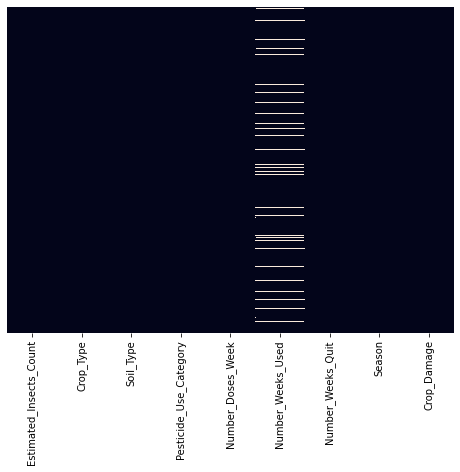

In [15]:
plt.figure(figsize=(8,6))
sns.heatmap(train.isnull(), yticklabels=False, cbar=False)

In [16]:
# Missing values in test
test.isnull().sum()

Estimated_Insects_Count      0
Crop_Type                    0
Soil_Type                    0
Pesticide_Use_Category       0
Number_Doses_Week            0
Number_Weeks_Used          119
Number_Weeks_Quit            0
Season                       0
dtype: int64

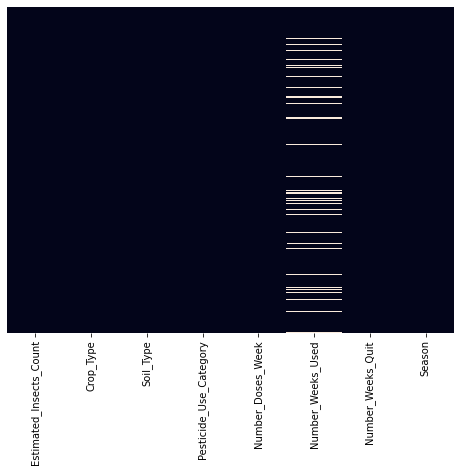

In [17]:
plt.figure(figsize=(8,6))
sns.heatmap(test.isnull(), yticklabels=False, cbar=False)

Observation:
    
     Number_Weeks_Used contains missing values. These variables are numeric data types. So, I will impute the missing values with mean

## Impute values in Numeric Column

In [18]:
# Impute in train
train['Number_Weeks_Used'].fillna(train['Number_Weeks_Used'].mean(), inplace=True)

In [19]:
# Impute in test
test['Number_Weeks_Used'].fillna(test['Number_Weeks_Used'].mean(), inplace=True)

Observation:

1. Now, all the missing values present in numeric columns are imputed

## Summary Statistics

In [20]:
# Train Statistics
train.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
count,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000,4599.000000
mean,1363.000435,0.224831,0.476625,2.283540,26.477495,28.891027,9.205479,1.894325,0.194390
std,814.439120,0.417517,0.499508,0.471978,15.524647,11.965785,9.713253,0.694952,0.454597
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,731.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000,0.000000
50%,1212.000000,0.000000,0.000000,2.000000,20.000000,28.891027,7.000000,2.000000,0.000000
75%,1786.000000,0.000000,1.000000,3.000000,40.000000,36.000000,16.000000,2.000000,0.000000
max,4097.000000,1.000000,1.000000,3.000000,95.000000,66.000000,47.000000,3.000000,2.000000


In [21]:
# Test Statistics
test.describe()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
count,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000,1199.000000
mean,1288.737281,0.194329,0.455379,2.383653,26.555463,29.033333,7.052544,1.881568
std,845.004912,0.395848,0.498213,0.522866,16.154101,12.130647,8.863634,0.685640
min,150.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,677.000000,0.000000,0.000000,2.000000,15.000000,20.000000,0.000000,1.000000
50%,1056.000000,0.000000,0.000000,2.000000,20.000000,29.033333,3.000000,2.000000
75%,1785.000000,0.000000,1.000000,3.000000,40.000000,36.000000,13.000000,2.000000
max,4097.000000,1.000000,1.000000,3.000000,90.000000,64.000000,42.000000,3.000000


Observation:
    
    1. For Estimated_Insects_Count, Crop_Type, Pesticide_Use_Category, Number_Doses_Week, Number_Weeks_Quit, mean is greater than median therefore data is right skewd for these attributes

## Correlation

In [22]:
train.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season,Crop_Damage
Estimated_Insects_Count,1.000000,-0.036911,-0.151796,-0.027111,-0.122509,0.427904,0.246719,-0.009482,0.202312
Crop_Type,-0.036911,1.000000,-0.175019,0.349662,-0.163832,-0.002128,-0.273475,-0.000549,0.021772
Soil_Type,-0.151796,-0.175019,1.000000,0.021661,0.050099,-0.093539,-0.034355,0.011052,-0.059481
Pesticide_Use_Category,-0.027111,0.349662,0.021661,1.000000,-0.005985,0.368106,-0.569467,0.008487,0.199195
Number_Doses_Week,-0.122509,-0.163832,0.050099,-0.005985,1.000000,0.099705,-0.032381,-0.003768,-0.018363
Number_Weeks_Used,0.427904,-0.002128,-0.093539,0.368106,0.099705,1.000000,-0.446200,-0.010590,0.231925
Number_Weeks_Quit,0.246719,-0.273475,-0.034355,-0.569467,-0.032381,-0.446200,1.000000,0.004861,-0.152918
Season,-0.009482,-0.000549,0.011052,0.008487,-0.003768,-0.010590,0.004861,1.000000,-0.016196
Crop_Damage,0.202312,0.021772,-0.059481,0.199195,-0.018363,0.231925,-0.152918,-0.016196,1.000000


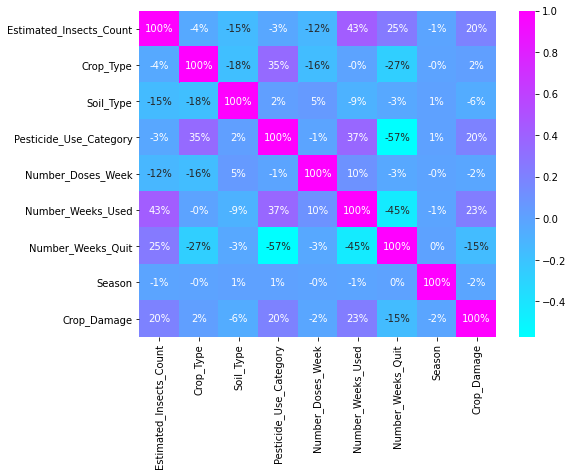

In [23]:
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(), annot=True, fmt='.0%', cmap='cool')

Observation:

1. Number_Weeks_Used, Numer_Weeks_quit, Season are negatively correlated with Soil_Type
2. Pesticide_Use_Category is highly negatively correlated with Number_Weeks_Quit
3. Number_Weeks_Used highly positively correlated with te Estimated_Insects_Count

In [24]:
test.corr()

,Estimated_Insects_Count,Crop_Type,Soil_Type,Pesticide_Use_Category,Number_Doses_Week,Number_Weeks_Used,Number_Weeks_Quit,Season
Estimated_Insects_Count,1.000000,0.020773,-0.339516,0.038259,-0.121168,0.491944,0.146441,0.023384
Crop_Type,0.020773,1.000000,0.063050,0.482378,-0.170014,0.062412,-0.390935,0.020282
Soil_Type,-0.339516,0.063050,1.000000,0.129857,0.057118,-0.139741,-0.191989,-0.069242
Pesticide_Use_Category,0.038259,0.482378,0.129857,1.000000,-0.010922,0.406020,-0.584312,0.015085
Number_Doses_Week,-0.121168,-0.170014,0.057118,-0.010922,1.000000,0.122996,0.009077,0.027197
Number_Weeks_Used,0.491944,0.062412,-0.139741,0.406020,0.122996,1.000000,-0.362582,0.018306
Number_Weeks_Quit,0.146441,-0.390935,-0.191989,-0.584312,0.009077,-0.362582,1.000000,0.030281
Season,0.023384,0.020282,-0.069242,0.015085,0.027197,0.018306,0.030281,1.000000


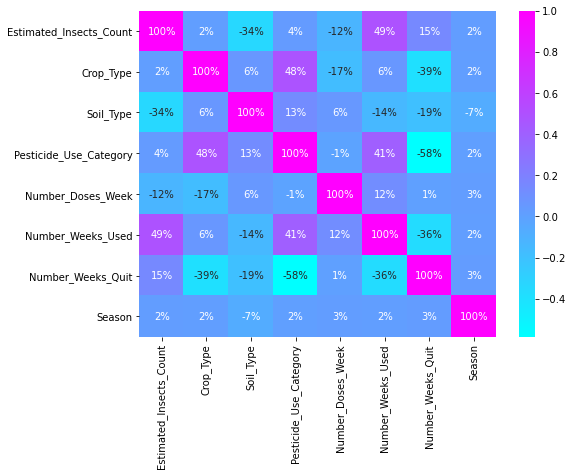

In [25]:
plt.figure(figsize=(8,6))
sns.heatmap(test.corr(), annot=True, fmt='.0%', cmap='cool')

Observation:
    1. Number_Weeks_Used, Numer_Weeks_quit, Season are negatively correlated with Soil_Type
    2. Crop_Type is highly negatively correlated with Number_Weeks_Quit
    3. Number_Weeks_Used highly positively correlated with te Estimated_Insects_Count

Text(0.5, 1.0, 'Correlation with Crop_Damage variable')

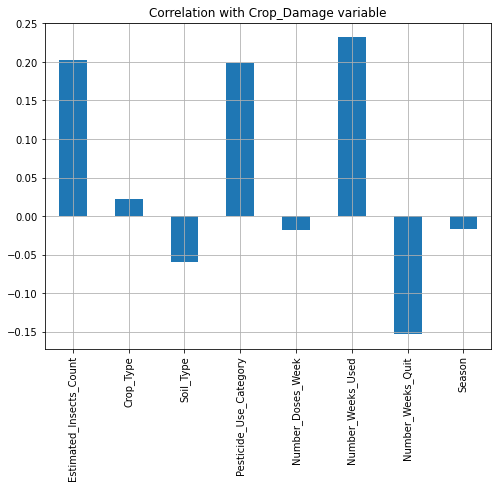

In [26]:
plt.figure(figsize=(8,6))
train.drop('Crop_Damage', axis=1).corrwith(train['Crop_Damage']).plot(kind='bar', grid=True)
plt.xticks(rotation=90)
plt.title('Correlation with Crop_Damage variable')

Observation:
    1. Soil_type, Number_Doses_Week, Number_Weeks_Quit, Season are negatively correlated with the Crop_Damage
    2. Number_Weeks_Quit is highly negatively correlated with Crop_Damage
    3. Number_Weeks_Used is highly positively correlated with Crop Damage

## Visualization

### UniVarient Analysis

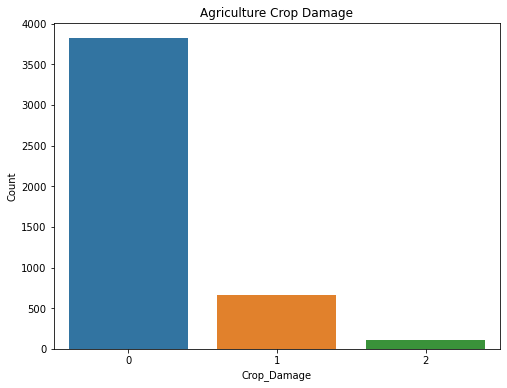

0    3820
1     664
2     115
Name: Crop_Damage, dtype: int64


In [27]:
# Checkign the Crop_damage in train dataset

plt.subplots(figsize=(8,6))
sns.countplot(x='Crop_Damage', data=train)
plt.title('Agriculture Crop Damage')
plt.xlabel('Crop_Damage')
plt.ylabel('Count')
plt.show()

print(train.Crop_Damage.value_counts())

Observation: 3820 crops are alive, 664 crops damage due to other causes and 115 crops damage due to Pesticides

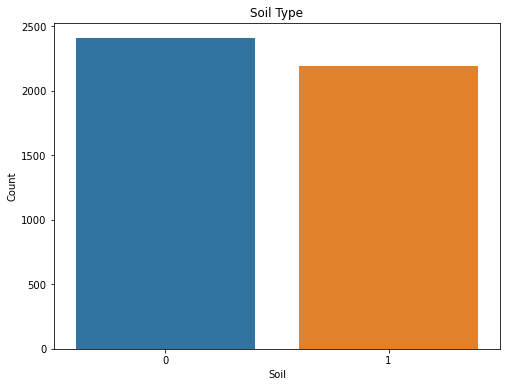

0    2407
1    2192
Name: Soil_Type, dtype: int64


In [28]:
# Checkign the Soil-Type

plt.subplots(figsize=(8,6))
sns.countplot(x='Soil_Type', data=train)
plt.title('Soil Type')
plt.xlabel('Soil')
plt.ylabel('Count')
plt.show()

print(train.Soil_Type.value_counts())

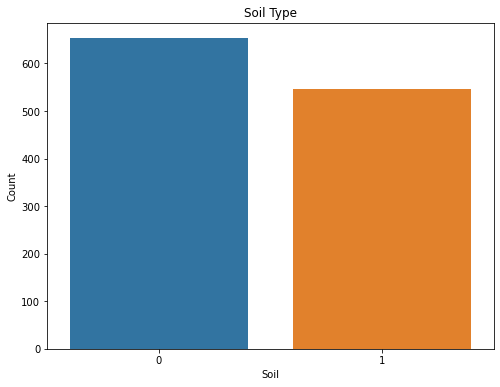

0    653
1    546
Name: Soil_Type, dtype: int64


In [29]:
# Checkign the Soil_Type

plt.subplots(figsize=(8,6))
sns.countplot(x='Soil_Type', data=test)
plt.title('Soil Type')
plt.xlabel('Soil')
plt.ylabel('Count')
plt.show()

print(test.Soil_Type.value_counts())

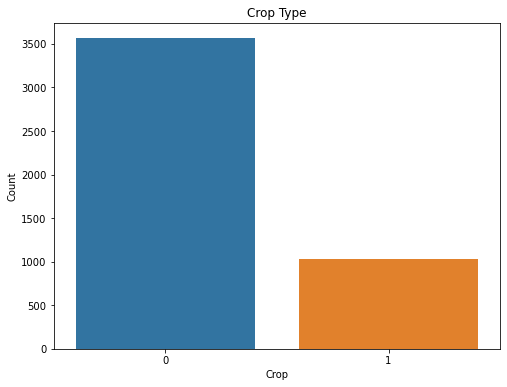

0    3565
1    1034
Name: Crop_Type, dtype: int64


In [30]:
# Checkign the Crop_type

plt.subplots(figsize=(8,6))
sns.countplot(x='Crop_Type', data=train)
plt.title('Crop Type')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()

print(train.Crop_Type.value_counts())

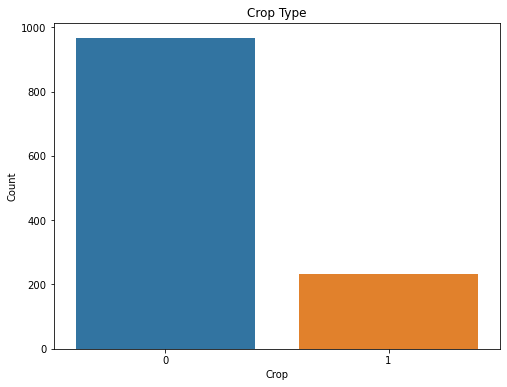

0    966
1    233
Name: Crop_Type, dtype: int64


In [31]:
# Checkign the Crop_type

plt.subplots(figsize=(8,6))
sns.countplot(x='Crop_Type', data=test)
plt.title('Crop Type')
plt.xlabel('Crop')
plt.ylabel('Count')
plt.show()

print(test.Crop_Type.value_counts())

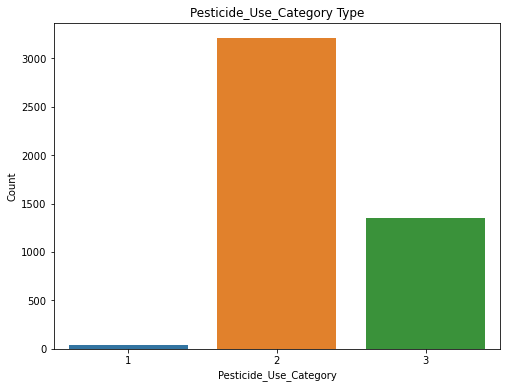

2    3205
3    1349
1      45
Name: Pesticide_Use_Category, dtype: int64


In [32]:
# Checkign the Pesticide_Use_Category

plt.subplots(figsize=(8,6))
sns.countplot(x='Pesticide_Use_Category', data=train)
plt.title('Pesticide_Use_Category Type')
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('Count')
plt.show()

print(train.Pesticide_Use_Category.value_counts())

Observation:
    3205 never pesticides used, 1349 previously pesticides used and 45 pesticides are currently using

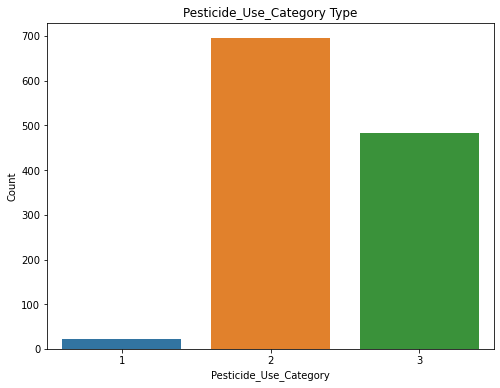

2    695
3    482
1     22
Name: Pesticide_Use_Category, dtype: int64


In [33]:
# Checkign the Pesticide_Use_Category

plt.subplots(figsize=(8,6))
sns.countplot(x='Pesticide_Use_Category', data=test)
plt.title('Pesticide_Use_Category Type')
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('Count')
plt.show()

print(test.Pesticide_Use_Category.value_counts())

Observation: 695 never pesticides used, 482 previously pesticides used and 22 pesticides are currently using

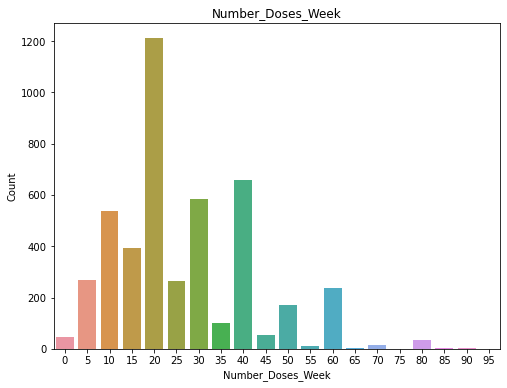

20    1211
40     657
30     584
10     537
15     393
5      268
25     263
60     237
50     172
35     101
45      53
0       45
80      36
70      17
55      11
90       5
85       4
65       3
75       1
95       1
Name: Number_Doses_Week, dtype: int64


In [34]:
# Checkign the Number_Doses_Week

plt.subplots(figsize=(8,6))
sns.countplot(x='Number_Doses_Week', data=train)
plt.title('Number_Doses_Week')
plt.xlabel('Number_Doses_Week')
plt.ylabel('Count')
plt.show()

print(train.Number_Doses_Week.value_counts())

Observation: 20 doses are used per week for 1211 crops

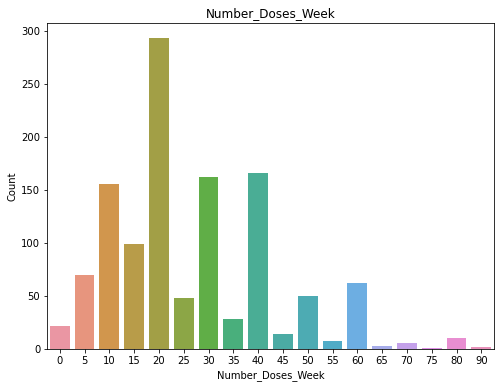

20    293
40    166
30    162
10    156
15     99
5      70
60     62
50     50
25     48
35     28
0      22
45     14
80     10
55      7
70      6
65      3
90      2
75      1
Name: Number_Doses_Week, dtype: int64


In [35]:
# Checkign the Number_Doses_Week

plt.subplots(figsize=(8,6))
sns.countplot(x='Number_Doses_Week', data=test)
plt.title('Number_Doses_Week')
plt.xlabel('Number_Doses_Week')
plt.ylabel('Count')
plt.show()

print(test.Number_Doses_Week.value_counts())

Observation: 20 doses are used per week for 293 crops

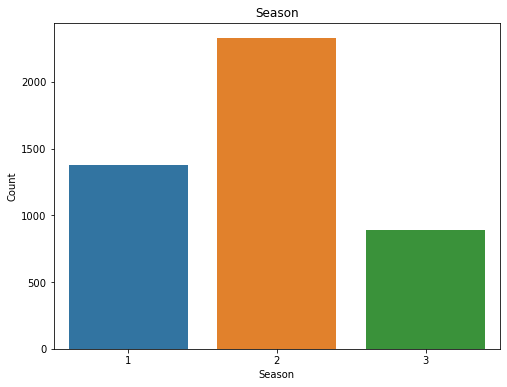

2    2327
1    1379
3     893
Name: Season, dtype: int64


In [36]:
# Checkign the Season

plt.subplots(figsize=(8,6))
sns.countplot(x='Season', data=train)
plt.title('Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

print(train.Season.value_counts())

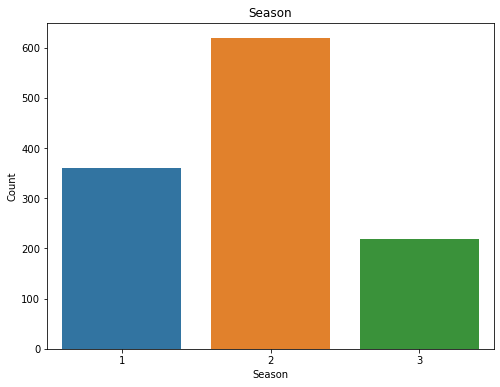

2    619
1    361
3    219
Name: Season, dtype: int64


In [37]:
# Checkign the Season

plt.subplots(figsize=(8,6))
sns.countplot(x='Season', data=test)
plt.title('Season')
plt.xlabel('Season')
plt.ylabel('Count')
plt.show()

print(test.Season.value_counts())

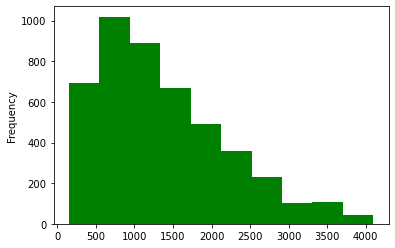

In [38]:
train['Estimated_Insects_Count'].plot(kind='hist',color=['green'])

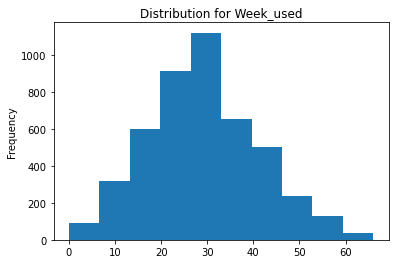

In [39]:
train['Number_Weeks_Used'].plot(kind='hist',title='Distribution for Week_used')

### BiVarient Analysis

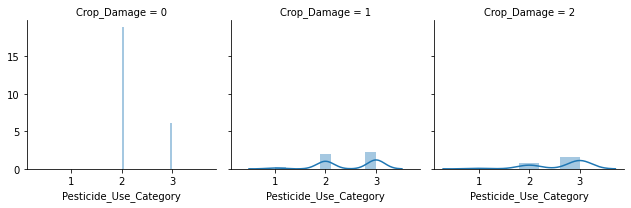

In [40]:
# Exploring crop_damage vs Pesticides_Use via Facegrid

facet = sns.FacetGrid(train, col='Crop_Damage')
facet.map(sns.distplot, 'Pesticide_Use_Category')
plt.show()

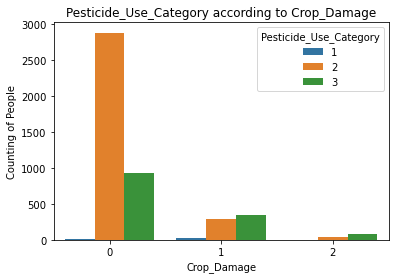

Crop_Damage  Pesticide_Use_Category
0            2                         2881
             3                          932
             1                            7
1            3                          341
             2                          290
             1                           33
2            3                           76
             2                           34
             1                            5
Name: Pesticide_Use_Category, dtype: int64


In [41]:
sns.countplot(x='Crop_Damage', hue='Pesticide_Use_Category', data=train)
plt.title('Pesticide_Use_Category according to Crop_Damage')
plt.xlabel('Crop_Damage')
plt.ylabel('Counting of People')
plt.show()

print(train.groupby('Crop_Damage')['Pesticide_Use_Category'].value_counts())

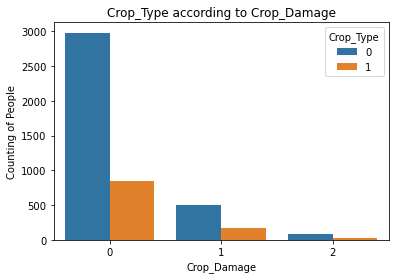

Crop_Damage  Crop_Type
0            0            2979
             1             841
1            0             498
             1             166
2            0              88
             1              27
Name: Crop_Type, dtype: int64


In [42]:
sns.countplot(x='Crop_Damage', hue='Crop_Type', data=train)
plt.title('Crop_Type according to Crop_Damage')
plt.xlabel('Crop_Damage')
plt.ylabel('Counting of People')
plt.show()

print(train.groupby('Crop_Damage')['Crop_Type'].value_counts())

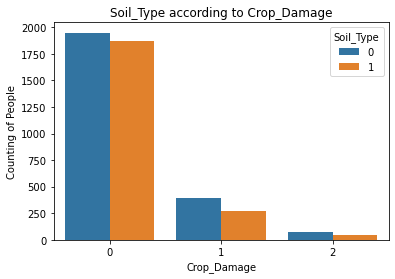

Crop_Damage  Soil_Type
0            0            1947
             1            1873
1            0             390
             1             274
2            0              70
             1              45
Name: Soil_Type, dtype: int64


In [43]:
sns.countplot(x='Crop_Damage', hue='Soil_Type', data=train)
plt.title('Soil_Type according to Crop_Damage')
plt.xlabel('Crop_Damage')
plt.ylabel('Counting of People')
plt.show()

print(train.groupby('Crop_Damage')['Soil_Type'].value_counts())

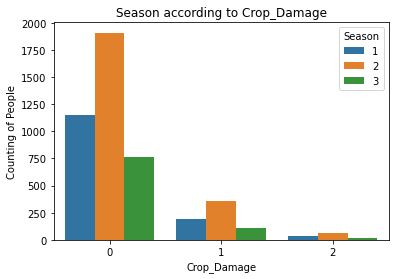

Crop_Damage  Season
0            2         1908
             1         1150
             3          762
1            2          358
             1          192
             3          114
2            2           61
             1           37
             3           17
Name: Season, dtype: int64


In [44]:
sns.countplot(x='Crop_Damage', hue='Season', data=train)
plt.title('Season according to Crop_Damage')
plt.xlabel('Crop_Damage')
plt.ylabel('Counting of People')
plt.show()

print(train.groupby('Crop_Damage')['Season'].value_counts())

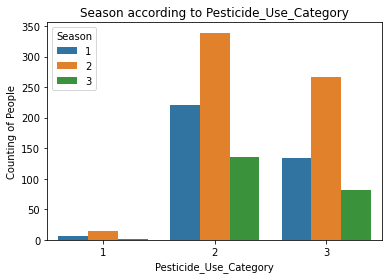

Pesticide_Use_Category  Season
1                       2          14
                        1           6
                        3           2
2                       2         339
                        1         221
                        3         135
3                       2         266
                        1         134
                        3          82
Name: Season, dtype: int64


In [45]:
sns.countplot(x='Pesticide_Use_Category', hue='Season', data=test)
plt.title('Season according to Pesticide_Use_Category')
plt.xlabel('Pesticide_Use_Category')
plt.ylabel('Counting of People')
plt.show()

print(test.groupby('Pesticide_Use_Category')['Season'].value_counts())

### MultiVarient Analysis

<Figure size 720x576 with 0 Axes>

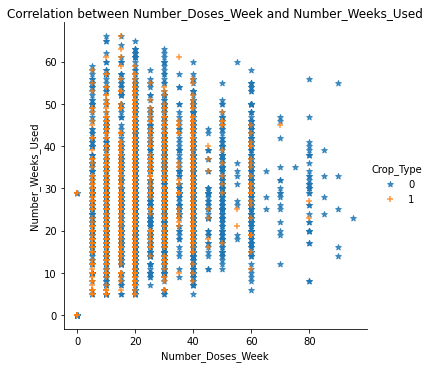

In [46]:
# Scatter Plot between Number_Doses_Week and LoanAmount

plt.figure(figsize=(10,8))
sns.lmplot(x='Number_Doses_Week', y='Number_Weeks_Used', fit_reg=False, data=train, hue='Crop_Type', markers=['*', '+'])
plt.xlabel('Number_Doses_Week')
plt.title('Correlation between Number_Doses_Week and Number_Weeks_Used')
plt.ylabel('Number_Weeks_Used')
plt.show()

<Figure size 720x576 with 0 Axes>

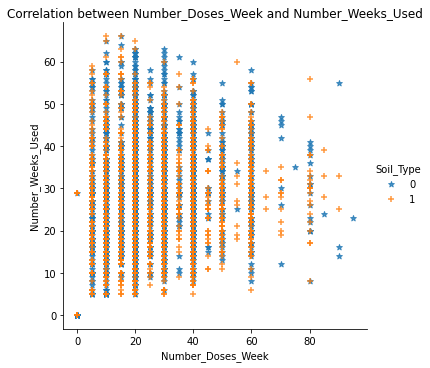

In [47]:
# Scatter Plot between Number_Doses_Week and LoanAmount

plt.figure(figsize=(10,8))
sns.lmplot(x='Number_Doses_Week', y='Number_Weeks_Used', fit_reg=False, data=train, hue='Soil_Type', markers=['*', '+'])
plt.xlabel('Number_Doses_Week')
plt.title('Correlation between Number_Doses_Week and Number_Weeks_Used')
plt.ylabel('Number_Weeks_Used')
plt.show()

## Skewness

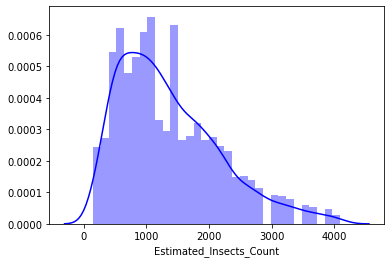

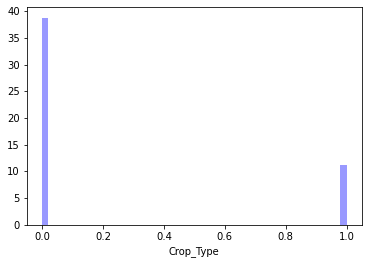

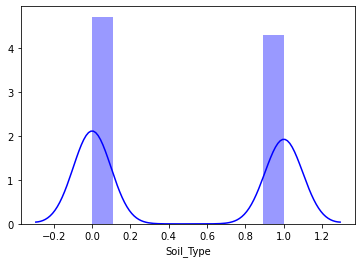

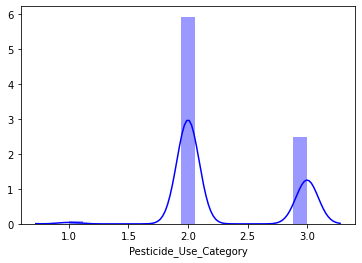

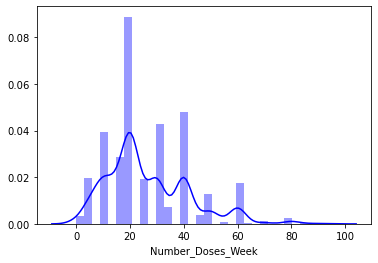

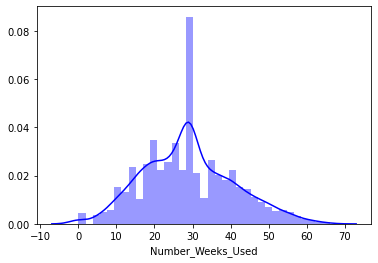

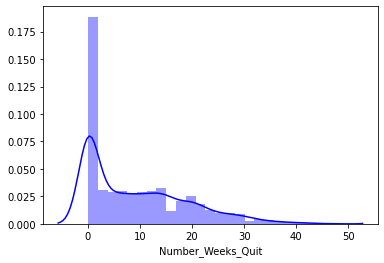

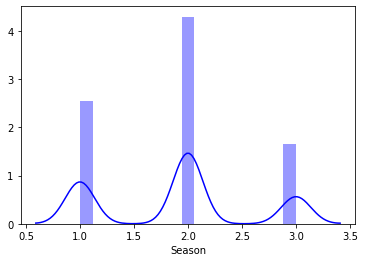

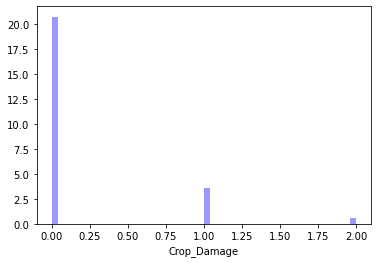

In [48]:
# Skewness of train
for i in train.describe().columns:
    sns.distplot(train[i], color='b')
    plt.show()

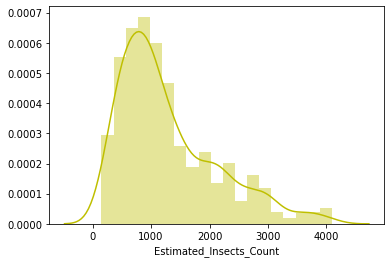

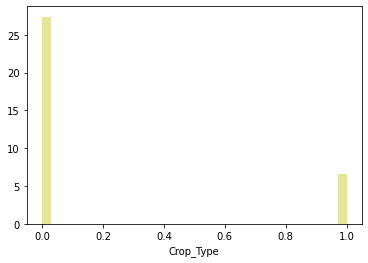

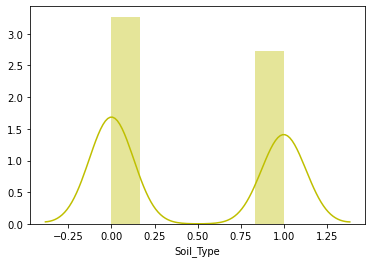

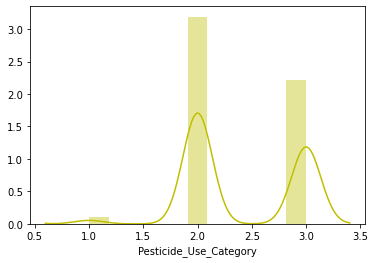

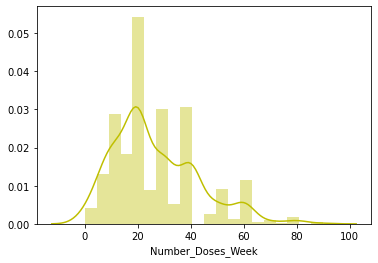

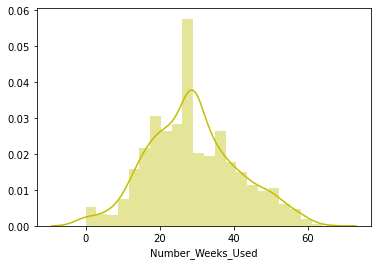

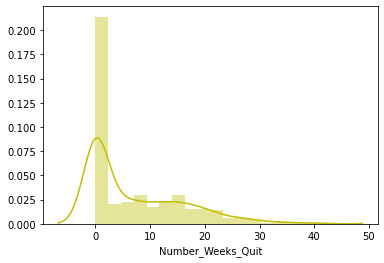

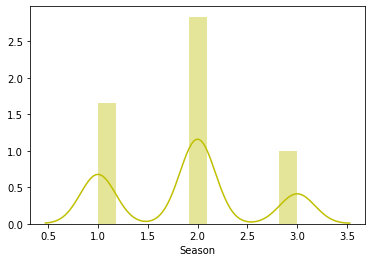

In [49]:
# Skewness of train
for i in test.describe().columns:
    sns.distplot(test[i], color='y')
    plt.show()

In [50]:
# train skewness
train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week          0.945895
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.919771
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [51]:
# Treating the Skewness via square root method

train.skew()

for i in train.skew().index:
    if i in ['Number_Weeks_Used', 'Number_Doses_Week', 'Number_Weeks_Quit']:
        if i in train.describe().columns:
            if train[i].skew() > 0.55:
                train[i] = np.sqrt(train[i])

In [52]:
train.skew()

Estimated_Insects_Count    0.911469
Crop_Type                  1.318693
Soil_Type                  0.093631
Pesticide_Use_Category     0.678586
Number_Doses_Week         -0.002742
Number_Weeks_Used          0.278664
Number_Weeks_Quit          0.054299
Season                     0.144841
Crop_Damage                2.306933
dtype: float64

In [53]:
# test Skewness
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week          0.872028
Number_Weeks_Used          0.220343
Number_Weeks_Quit          1.191013
Season                     0.155872
dtype: float64

In [54]:
# Treating the Skewness via square root method

test.skew()

for i in test.skew().index:
    if i in ['Number_Weeks_Used', 'Number_Doses_Week', 'Number_Weeks_Quit']:
        if i in test.describe().columns:
            if test[i].skew() > 0.55:
                test[i] = np.sqrt(test[i])

In [55]:
test.skew()

Estimated_Insects_Count    1.098665
Crop_Type                  1.546968
Soil_Type                  0.179422
Pesticide_Use_Category     0.089675
Number_Doses_Week         -0.149741
Number_Weeks_Used          0.220343
Number_Weeks_Quit          0.391417
Season                     0.155872
dtype: float64

## Plotting Outliers

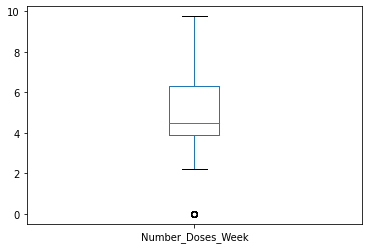

In [56]:
train['Number_Doses_Week'].plot.box()

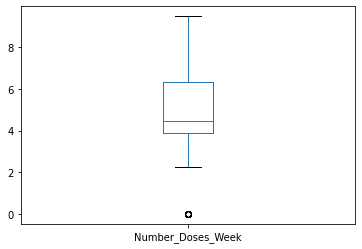

In [57]:
test['Number_Doses_Week'].plot.box()

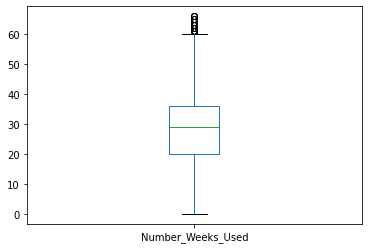

In [58]:
train['Number_Weeks_Used'].plot.box()

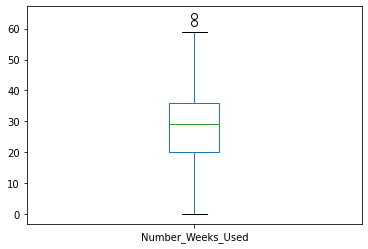

In [59]:
test['Number_Weeks_Used'].plot.box()

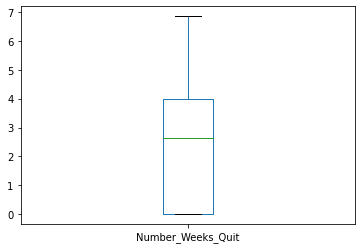

In [60]:
train['Number_Weeks_Quit'].plot.box()

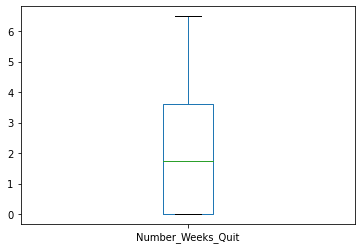

In [61]:
test['Number_Weeks_Quit'].plot.box()

## Removing the Outliers

In [62]:
from scipy.stats import zscore

z = np.abs(zscore(train))
z

array([[1.44286807, 1.85681868, 0.95429408, ..., 1.21243919, 1.28702725,
        0.42765624],
       [1.41708065, 1.85681868, 0.95429408, ..., 1.21243919, 0.15207762,
        1.77233374],
       [1.35813798, 1.85681868, 0.95429408, ..., 1.21243919, 0.15207762,
        1.77233374],
       ...,
       [1.11008649, 0.53855555, 1.04789501, ..., 1.47914473, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 1.32521046, 0.15207762,
        0.42765624],
       [1.11008649, 0.53855555, 1.04789501, ..., 0.92331125, 0.15207762,
        0.42765624]])

In [63]:
threshold =3

print(np.where(z>3))

(array([   0,    1,    2,    3,    4,    5,    6,    7,    7,    8,    9,
          9,   10,   11,   12,   13,   14,   14,   15,   16,   17,   18,
         19,   20,   21,   22,   22,   23,   23,  103,  112,  149,  165,
        166,  167,  179,  186,  197,  207,  222,  223,  242,  248,  264,
        265,  290,  296,  305,  316,  351,  355,  361,  374,  375,  377,
        384,  453,  458,  466,  480,  510,  517,  522,  557,  595,  612,
        634,  693,  702,  703,  704,  705,  706,  819,  944,  980, 1067,
       1178, 1327, 1339, 1340, 1341, 1342, 1343, 1344, 1345, 1346, 1347,
       1348, 1349, 1737, 1807, 2043, 2139, 2170, 2171, 2190, 2191, 2192,
       2193, 2194, 2237, 2571, 2572, 2573, 2574, 2575, 2576, 2577, 2578,
       2579, 2580, 2581, 2582, 2583, 2584, 2585, 2585, 2586, 2587, 2588,
       2589, 2589, 2590, 2590, 2590, 2591, 2591, 2663, 2671, 2696, 2710,
       2716, 2723, 2767, 2792, 2796, 2797, 2804, 2806, 2814, 2828, 2829,
       2834, 2841, 2842, 2851, 2860, 2861, 2870, 2

In [64]:
new_train = train[(z<3).all(axis=1)]

In [65]:
from scipy.stats import zscore

zt = np.abs(zscore(test))
zt

array([[1.30318366e+00, 2.03615391e+00, 1.09360445e+00, ...,
        5.85986262e-16, 9.74395945e-01, 1.72804130e-01],
       [1.04035366e+00, 2.03615391e+00, 1.09360445e+00, ...,
        2.39438582e+00, 9.74395945e-01, 1.72804130e-01],
       [7.84627185e-01, 2.03615391e+00, 9.14407397e-01, ...,
        2.39438582e+00, 9.74395945e-01, 1.72804130e-01],
       ...,
       [1.85564227e-01, 4.91122009e-01, 1.09360445e+00, ...,
        1.32227276e+00, 1.54703332e+00, 1.28629553e+00],
       [9.08507165e-02, 4.91122009e-01, 1.09360445e+00, ...,
        4.92072401e-01, 2.01226513e-01, 1.28629553e+00],
       [9.08507165e-02, 4.91122009e-01, 1.09360445e+00, ...,
        5.85986262e-16, 1.37684897e+00, 1.63190379e+00]])

In [66]:
print(np.where(zt>3))

(array([280, 281, 282, 501, 502, 503, 910, 911, 912, 913, 914, 915, 916],
      dtype=int64), array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64))


In [67]:
new_test = test[(zt<3).all(axis=1)]

In [68]:
print(train.shape, new_train.shape)

(4599, 9) (4401, 9)


In [69]:
train = new_train

In [70]:
print(test.shape, new_test.shape)

(1199, 8) (1186, 8)


In [71]:
test = new_test

## Model Training

In [72]:
x_train, y = train.drop(["Crop_Damage"], axis=1).values, train["Crop_Damage"].values
x_test = test.values

In [73]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x_train, y, train_size=0.8, test_size=0.2, random_state=42)

In [74]:
# Importing the model library

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

# Import Error Metrics
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, cross_val_score

In [75]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

In [76]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, BaggingClassifier, ExtraTreesClassifier

In [77]:
model = [LogisticRegression(), KNeighborsClassifier(), SVC(), MultinomialNB(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    m.fit(x_train, y_train)
    print('Score of %s Model is %s' % (m, m.score(x_train, y_train)))
    predm = m.predict(x_test)
    print('Accuracy_score: %s' % (accuracy_score(y_test, predm)))
    print('Confusion Matrix : \n', confusion_matrix(y_test, predm))
    print('\nClassification Report : \n', classification_report(y_test, predm))
    print('F1 Score: ',round(f1_score(y_test, predm, average='micro')*100,2))


*************** LogisticRegression() Model ***************

Score of LogisticRegression() Model is 0.8517045454545454
Accuracy_score: 0.8694665153234961
Confusion Matrix : 
 [[759  10]
 [105   7]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       769
           1       0.41      0.06      0.11       112

    accuracy                           0.87       881
   macro avg       0.65      0.52      0.52       881
weighted avg       0.82      0.87      0.83       881

F1 Score:  86.95

*************** KNeighborsClassifier() Model ***************

Score of KNeighborsClassifier() Model is 0.8786931818181818
Accuracy_score: 0.8433598183881952
Confusion Matrix : 
 [[725  44]
 [ 94  18]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.89      0.94      0.91       769
           1       0.29      0.16      0.21       112

    accuracy                          

In [78]:
# Cross_val_score

model = [LogisticRegression(), KNeighborsClassifier(), SVC(), MultinomialNB(), DecisionTreeClassifier(), RandomForestClassifier(), AdaBoostClassifier(), GradientBoostingClassifier(), BaggingClassifier(), ExtraTreesClassifier()]

for m in model:
    print('\n*************** %s Model ***************\n' % m)
    cv_score = cross_val_score(m, x_train, y_train, cv=5, scoring = 'accuracy')
    print('Score of %s Model is %s' % (m, cv_score))
    print('Mean score: ', cv_score.mean())
    print('Std score : ', cv_score.std())
    print('Min score : ', cv_score.min())
    print('Max score : ', cv_score.max())


*************** LogisticRegression() Model ***************

Score of LogisticRegression() Model is [0.85653409 0.84943182 0.85369318 0.85369318 0.85227273]
Mean score:  0.853125
Std score :  0.002307965455862475
Min score :  0.8494318181818182
Max score :  0.8565340909090909

*************** KNeighborsClassifier() Model ***************

Score of KNeighborsClassifier() Model is [0.83948864 0.84232955 0.85227273 0.83380682 0.84232955]
Mean score:  0.8420454545454547
Std score :  0.005986166905029958
Min score :  0.8338068181818182
Max score :  0.8522727272727273

*************** SVC() Model ***************

Score of SVC() Model is [0.85795455 0.85653409 0.85653409 0.85653409 0.85653409]
Mean score:  0.8568181818181818
Std score :  0.0005681818181817899
Min score :  0.8565340909090909
Max score :  0.8579545454545454

*************** MultinomialNB() Model ***************

Score of MultinomialNB() Model is [0.76704545 0.77556818 0.79403409 0.79829545 0.77698864]
Mean score:  0.782386363636

Observation:

From above models, LogisticRegression(), AdaBoostClassifier(), SVC() gives the best results

We use the GridSearchCV to find the best parameters and check the score and after that we finalized our model

#### Using GridSearchCV to find the best Parameters in Lostic Regression

In [79]:
params = {'C':[1,10], 'random_state':range(42, 100)}
lg = LogisticRegression()

clf = GridSearchCV(lg, params)
clf.fit(x_train, y_train)
print('Best Parameters: ', clf.best_params_)

Best Parameters:  {'C': 1, 'random_state': 42}


In [80]:
# Logistic REgression with best parameters

lg = LogisticRegression(C=1, random_state=42)
lg.fit(x_train, y_train)
lg.score(x_train, y_train)
predlg = lg.predict(x_test)
print('Accuracy_score: %s' % (accuracy_score(y_test, predlg)))
print('Confusion Matrix : \n', confusion_matrix(y_test, predlg))
print('\nClassification Report : \n', classification_report(y_test, predlg))
print('F1 Score: ',round(f1_score(y_test, predlg, average='micro')*100,2))

Accuracy_score: 0.8694665153234961
Confusion Matrix : 
 [[759  10]
 [105   7]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       769
           1       0.41      0.06      0.11       112

    accuracy                           0.87       881
   macro avg       0.65      0.52      0.52       881
weighted avg       0.82      0.87      0.83       881

F1 Score:  86.95


#### Using GridSearchCV to find out the best parameters in SVM

In [81]:
params = {'kernel':('linear', 'rbf', 'poly'), 'C':[1, 10]}
svc = SVC()
clf = GridSearchCV(svc, params)
clf.fit(x_train, y_train)
print('Best Parameters: ', clf.best_params_)

Best Parameters:  {'C': 1, 'kernel': 'rbf'}


In [82]:
svc = SVC(C=1, kernel='rbf', random_state=48)
svc.fit(x_train, y_train)
svc.score(x_train, y_train)
predsvc = svc.predict(x_test)
print('Accuracy_score: %s' % (accuracy_score(y_test, predsvc)))
print('Confusion Matrix : \n', confusion_matrix(y_test, predsvc))
print('\nClassification Report : \n', classification_report(y_test, predsvc))
print('F1 Score: ',round(f1_score(y_test, predsvc, average='micro')*100,2))

Accuracy_score: 0.8728717366628831
Confusion Matrix : 
 [[769   0]
 [112   0]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.87      1.00      0.93       769
           1       0.00      0.00      0.00       112

    accuracy                           0.87       881
   macro avg       0.44      0.50      0.47       881
weighted avg       0.76      0.87      0.81       881

F1 Score:  87.29


In [84]:
# Cross validation
cv_score = cross_val_score(svc, x_train, y_train, cv=5, scoring = 'accuracy')
print('Score of %s Model is %s' % (svc, cv_score))
print('Mean score: ', cv_score.mean())
print('Std score : ', cv_score.std())
print('Min score : ', cv_score.min())
print('Max score : ', cv_score.max())

Score of SVC(C=1, random_state=48) Model is [0.85795455 0.85653409 0.85653409 0.85653409 0.85653409]
Mean score:  0.8568181818181818
Std score :  0.0005681818181817899
Min score :  0.8565340909090909
Max score :  0.8579545454545454


#### Using GridSearchCV to find out the best parameters in AdaBoost

In [89]:
params = {"base_estimator__criterion" : ["gini", "entropy"], "base_estimator__splitter" : ["best", "random"], "n_estimators": [1, 2, 50, 100], 'learning_rate': [0.001, 0.01, 0.1,1.0]}
DTC = DecisionTreeClassifier(random_state = 48, max_features = "auto", class_weight = "balanced",max_depth = None)

ad = AdaBoostClassifier(base_estimator = DTC)

clf = GridSearchCV(ad, params)
clf.fit(x_train, y_train)
print('Best Parameters: ', clf.best_params_)

Best Parameters:  {'base_estimator__criterion': 'entropy', 'base_estimator__splitter': 'random', 'learning_rate': 1.0, 'n_estimators': 2}


In [100]:
# AdaBoostClassifier(base_estimator=DecisionTreeClassifier(), n_estimator=50, learning_rate=1.0)
ad = AdaBoostClassifier()
ad.fit(x_train, y_train)
ad_pred = ad.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test, ad_pred))
print('Confusion Matrix : \n', confusion_matrix(y_test, ad_pred))
print('\nClassification Report : \n', classification_report(y_test, ad_pred))
print('F1 Score: ',round(f1_score(y_test, ad_pred, average='micro')*100,2))

Accuracy Score: 0.8683314415437003
Confusion Matrix : 
 [[753  16]
 [100  12]]

Classification Report : 
               precision    recall  f1-score   support

           0       0.88      0.98      0.93       769
           1       0.43      0.11      0.17       112

    accuracy                           0.87       881
   macro avg       0.66      0.54      0.55       881
weighted avg       0.83      0.87      0.83       881

F1 Score:  86.83


In [101]:
# Cross validation
cv_score = cross_val_score(ad, x_train, y_train, cv=5, scoring = 'accuracy')
print('Score of %s Model is %s' % (ad, cv_score))
print('Mean score: ', cv_score.mean())
print('Std score : ', cv_score.std())
print('Min score : ', cv_score.min())
print('Max score : ', cv_score.max())

Score of AdaBoostClassifier() Model is [0.85369318 0.85227273 0.859375   0.85653409 0.84090909]
Mean score:  0.8525568181818182
Std score :  0.0063142360144581924
Min score :  0.8409090909090909
Max score :  0.859375


Observation: SVC() accuracy scores and F1 Score are better than other model

In [103]:
# Saving the predicted value to .csv

prediction = pd.DataFrame(predsvc, columns=['Predictions']).to_csv('Data/Predicted_agriculture.csv')

In [104]:
# Saving SVC

import joblib
joblib.dump(svc, 'svc_agriculture.pkl')

['svc_agriculture.pkl']

## Conclusion:

We tried a Grid Search then using the Logistic Regression, SVC and AdaBoost Method, to find the best Hyperprarameters!

Here, our Hyperparamter Tuning was more focussed on Getting a Better Macro F1 Score and Accuracy Score with SVC Model! -> 87.3% overall